In [1]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Mengambil dan membaca data yang diperlukan
df = pd.read_csv('dataset.csv')
df

,Company Name,Entrepreneur,Provinces,Industry Sector,Main Products,Jumlah Tenaga Kerja,Business Model,Pendanaan
0,CV Deco,Muhammad Hamsir,SULAWESI SELATAN,Consultant Services,Jasa,13,B2C,0
1,LAPAK BAHTERA AYAM POTONG,FIRMAN,KALIMANTAN UTARA,Food Processing,AYAM POTONG,1,Hybrid B2B and B2C,"9,000,000"
2,Budidaya Jamur Tiram,Zahrah,KALIMANTAN SELATAN,Agriculture,Jamur tiram,1,Hybrid B2B and B2C,"10,000,000"
3,Holtikultura Srimulyanti,Srimulyanti,SULAWESI TENGAH,Agriculture,Cabai dan Kacang Hijau,3,Hybrid B2B and B2C,"3,000,000"
4,Toko Pertanian Bu Siswarsini,Siswarsini,JAWA TENGAH,Retail,Toko pertanian,2,B2C,"9,500,000"
...,...,...,...,...,...,...,...,...
455,Pandopo Catring,Alphabet Incubator,BANTEN,Food and Beverage,Catering,5,B2C,"80,000,000"
456,Renewable Energy,Alphabet Incubator,BANTEN,Green Technology,Teknologi Renewable Energy,5,B2B,"3,750,000"
457,Salted Egg Milea,Alphabet Incubator,BANTEN,Food and Beverage,Telur Asin,3,B2C,"80,000,000"
458,Sesindo,Alphabet Incubator,BANTEN,Production,Merchandise,5,B2C,"122,000,000"


In [3]:
#Membagi data X dan y
X = df.iloc[:, 2:4].values
y = df.iloc[:, -2].values
print(X)
print(y)

[['SULAWESI SELATAN' 'Consultant Services']
 ['KALIMANTAN UTARA' 'Food Processing']
 ['KALIMANTAN SELATAN' 'Agriculture']
 ['SULAWESI TENGAH' 'Agriculture']
 ['JAWA TENGAH' 'Retail']
 ['SULAWESI SELATAN' 'Aquaculture']
 ['SULAWESI UTARA' 'Agriculture']
 ['SULAWESI UTARA' 'Fisheries']
 ['SULAWESI UTARA' 'Agriculture']
 ['SULAWESI UTARA' 'Fisheries']
 ['SULAWESI UTARA' 'Fisheries']
 ['JAWA TENGAH' 'Aquaculture']
 ['KALIMANTAN BARAT' 'Farms']
 ['SULAWESI TENGGARA' 'Food and Beverage']
 ['BENGKULU' 'Agriculture']
 ['DI YOGYAKARTA' 'Aquaculture']
 ['DI YOGYAKARTA' 'Agriculture']
 ['MALUKU' 'Agriculture']
 ['SULAWESI TENGGARA' 'Food and Beverage']
 ['SULAWESI TENGGARA' 'Food and Beverage']
 ['SULAWESI SELATAN' 'Aquaculture']
 ['SULAWESI SELATAN' 'Agriculture']
 ['SULAWESI TENGGARA' 'Food and Beverage']
 ['SULAWESI TENGGARA' 'Agriculture']
 ['SULAWESI SELATAN' 'Aquaculture']
 ['NUSA TENGGARA BARAT' 'Aquaculture']
 ['KALIMANTAN TENGAH' 'Herbs']
 ['KALIMANTAN TENGAH' 'Farms']
 ['ACEH' 'Food and

In [4]:
#mengubah data X string menjadi int
le1 = LabelEncoder()
X1 = le1.fit_transform(df.iloc[:, 2])
print(X1)

le2 = LabelEncoder()
X2 = le2.fit_transform(df.iloc[:, 3])
print(X2)
X = np.column_stack([X1, X2])
#print(X)

[26 16 13 27 10 26 29 29 29 29 29 10 12 28  4  5  5 20 28 28 26 26 28 28
 26 22 14 14  1 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17  7 27 27 27 16 19 16 16 27 19 19 17  7 17 17
 17 17 17 17 17 19 19 19 19 16 16 16 27 27 16 10  5 12 12 12 12 12 12 12
 12 12 12 12 12 16  8  8 10 10 10 10 29  9  9  9  9  9  9 30 30  9 21 29
 21 21 29 21 21 31 21 21 31 29  8  8 26 29  8 10  7  6  8  8  8 12 12 15
 12 12 15 12 12 12 12 12 12 15 15 15  5  5  5  0  7 18 18 18 13 13 24  7
 24 24 11  7 11 11 11  5  5  5  5  5  5  5  5  5  5 11 11 11  5  5  5  5
  5  5  5  5  5  5  4 11  5  5  5  5  5  5  5  4  7  5  9 26 26 24  9  9
 26 26 26  9  9 26 26 26  9  1  9 19 11 22 22 19 19 19 11 11 11 11 22 22
 22 22 22 11 22 22 22 22 22 22 24 11 27 27  5 26 26 26 26  5 17 26 16 16
 16 25 17 19 16 10 29 29 29 29 29 29 10 30 21 29 29 31 29 29 29  6  6  6
  6  6 15 23 13 13 14  4  5  5 20  5  5  5  5  2 20  1  1  1 26 25 23 23
 27 27 19 27 29 29 29 10 10 10 10 29 31 29 29 29 29

In [5]:
#Mengubah data y string menjadi integer
le3 = LabelEncoder()
y = le3.fit_transform(y)
print(y)

[1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 0 0 2 1 1 2 1 2 2 2 2 1 1 0 2 1 2 1 1 1 2 2
 2 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 2 1 2 2 2 1 2 1 1
 2 1 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0
 2 1 1 1 2 1 1 1 1 1 1 1 2 2 0 2 1 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 0 1 2
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 1 1 0 0 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 2 2 1 1 1
 2 1 1 3 3 2 2 1 2 3 1 1 0 1 1 2]


In [6]:
# Membagi data menjadi train dan test (train sebanyak 75% dan test sebanyak 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [7]:
# Melakukan prediksi model menggunakan random forest
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [8]:
# Melihat hasil dari prediksi random forest
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [2 2]
 [1 1]
 [1 1]
 [2 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [2 3]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]]


In [9]:
#Melihat confusion matrix dan akurasi dari random forest
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  2  2  0]
 [ 0 79  2  0]
 [ 0 14 15  0]
 [ 0  0  1  0]]


0.8173913043478261

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.83      0.98      0.90        81
           2       0.75      0.52      0.61        29
           3       0.00      0.00      0.00         1

    accuracy                           0.82       115
   macro avg       0.40      0.37      0.38       115
weighted avg       0.77      0.82      0.79       115



C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [12]:
print('Prediksi Business Model')
for i in range(len(le1.classes_)):
    print(i, ':', le1.classes_[i])
provinsi = input('Pilih provinsi:')
print()
for i in range(len(le2.classes_)):
    print(i, ':', le2.classes_[i])
industry_sector = input('Pilih sektor industri:')
print()
print('Business Model yang sesuai adalah', le3.classes_[classifier.predict([[provinsi,industry_sector]])[0]])

Prediksi Business Model
0 :  KALIMANTAN SELATAN
1 : ACEH
2 : BALI
3 : BANTEN
4 : BENGKULU
5 : DI YOGYAKARTA
6 : DKI JAKARTA
7 : GORONTALO
8 : JAMBI
9 : JAWA BARAT
10 : JAWA TENGAH
11 : JAWA TIMUR
12 : KALIMANTAN BARAT
13 : KALIMANTAN SELATAN
14 : KALIMANTAN TENGAH
15 : KALIMANTAN TIMUR
16 : KALIMANTAN UTARA
17 : KEPULAUAN BANGKA BELITUNG
18 : KEPULAUAN RIAU
19 : LAMPUNG
20 : MALUKU
21 : MALUKU UTARA
22 : NUSA TENGGARA BARAT
23 : NUSA TENGGARA TIMUR
24 : RIAU
25 : SULAWESI BARAT
26 : SULAWESI SELATAN
27 : SULAWESI TENGAH
28 : SULAWESI TENGGARA
29 : SULAWESI UTARA
30 : SUMATERA SELATAN
31 : SUMATERA UTARA


Pilih provinsi: 5



0 : Agriculture
1 : Aquaculture
2 : Beauty
3 : Blockchain
4 : Consultant Services
5 : Digital Business Development
6 : EduTech
7 : Electronic
8 : Energy Distribution
9 : Farms
10 : Fashion
11 : Fisheries
12 : Food Processing
13 : Food and Beverage
14 : Graphic Design and Creative
15 : Green Technology
16 : Herbs
17 : Hospitality
18 : Internet
19 : Open Journal System
20 : Petshop
21 : Production
22 : Retail
23 : Services
24 : Sport & Music
25 : Technology and Information
26 : Textile


Pilih sektor industri: 13



Business Model yang sesuai adalah B2C


In [12]:
pickle.dump(classifier, open('model.pkl', 'wb'))

## Visualisasi Data

In [13]:
df['Industry Sector'].unique()

array(['Consultant Services', 'Food Processing', 'Agriculture', 'Retail',
       'Aquaculture', 'Fisheries', 'Farms', 'Food and Beverage', 'Herbs',
       'Fashion', 'Production', 'Textile', 'Services',
       'Energy Distribution', 'Petshop', 'Electronic', 'Sport & Music',
       'Beauty', 'Internet', 'Hospitality', 'Graphic Design and Creative',
       'Technology and Information', 'Blockchain',
       'Digital Business Development', 'EduTech', 'Open Journal System',
       'Green Technology'], dtype=object)

In [14]:
def count_sector_by_bm(bm):
    return df[['Industry Sector', 'Business Model']].loc[df['Industry Sector'] == bm].value_counts().reset_index()

count_sector_by_bm('Food Processing')

,Industry Sector,Business Model,count
0,Food Processing,B2C,14
1,Food Processing,Hybrid B2B and B2C,12


In [15]:
most_data_industry_sector = df[['Industry Sector', 'Business Model']].loc[(df['Industry Sector'] == 'FnB') | (df['Industry Sector'] == 'Production') | (df['Industry Sector'] == 'Fashion') | (df['Industry Sector'] == 'Retail') | (df['Industry Sector'] == 'Food Processing') | (df['Industry Sector'] == 'Services') | (df['Industry Sector'] == 'Textile') | (df['Industry Sector'] == 'Agriculture') | (df['Industry Sector'] == 'Aquaculture') | (df['Industry Sector'] == 'Beauty')].value_counts().reset_index()
most_data_industry_sector

,Industry Sector,Business Model,count
0,Retail,B2C,30
1,Production,B2C,29
2,Fashion,B2C,26
3,Services,B2C,18
4,Food Processing,B2C,14
5,Food Processing,Hybrid B2B and B2C,12
6,Textile,B2C,10
7,Agriculture,Hybrid B2B and B2C,9
8,Production,Hybrid B2B and B2C,9
9,Aquaculture,Hybrid B2B and B2C,7


In [17]:
df['Industry Sector'].value_counts().head(10)

Industry Sector
Food and Beverage    237
Production            39
Fashion               33
Retail                32
Food Processing       26
Services              20
Textile               14
Agriculture           10
Aquaculture            7
Beauty                 6
Name: count, dtype: int64

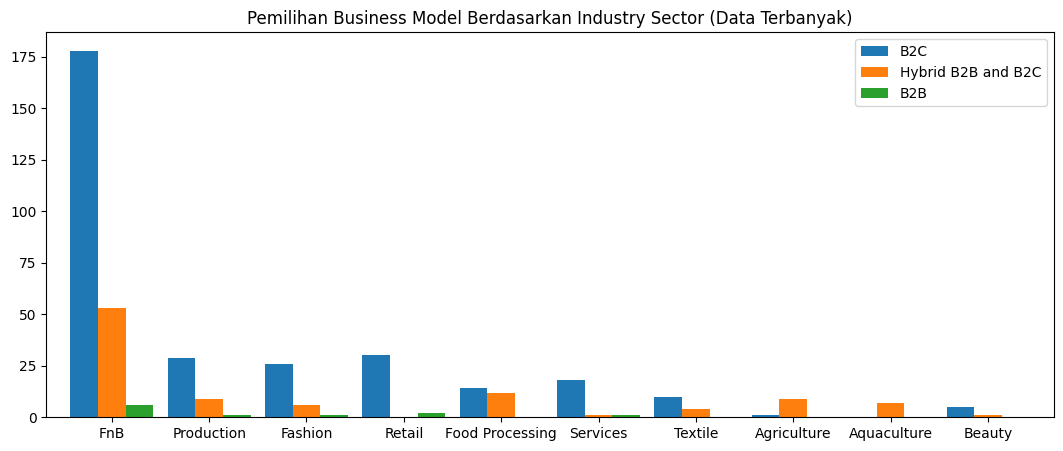

In [18]:
b2c = [178, 29, 26, 30, 14, 18, 10, 1, 0, 5]
hybrid = [53, 9, 6, 0, 12, 1, 4, 9, 7, 1]
b2b = [6, 1, 1, 2, 0, 1, 0, 0, 0, 0]
index = ['FnB', 'Production', 'Fashion', 'Retail', 'Food Processing', 'Services', 'Textile', 'Agriculture', 'Aquaculture', 'Beauty']
industry_sector = pd.DataFrame({'B2C': b2c,
                                'Hybrid B2B and B2C': hybrid,
                                'B2B': b2b}, index=index)
fig, ax = plt.subplots(figsize=(13, 5))
industry_sector.plot.bar(title='Pemilihan Business Model Berdasarkan Industry Sector (Data Terbanyak)', width=0.85, ax=ax)
plt.xticks(rotation=0)
plt.savefig('tes.jpg')
plt.show()

In [19]:
most_data_provinces = df[['Provinces', 'Business Model']].loc[(df['Provinces'] == 'YOGYAKARTA') | (df['Provinces'] == 'SULAWESI UTARA') | (df['Provinces'] == 'KEPULAUAN BANGKA BELITUNG') | (df['Provinces'] == 'KALIMANTAN BARAT') | (df['Provinces'] == 'SULAWESI SELATAN') | (df['Provinces'] == 'NUSA TENGGARA BARAT') | (df['Provinces'] == 'BANTEN') | (df['Provinces'] == 'JAWA TIMUR') | (df['Provinces'] == 'LAMPUNG') | (df['Provinces'] == 'JAWA TENGAH')].value_counts().reset_index()
most_data_provinces

,Provinces,Business Model,count
0,KEPULAUAN BANGKA BELITUNG,B2C,38
1,SULAWESI UTARA,B2C,34
2,KALIMANTAN BARAT,B2C,21
3,SULAWESI SELATAN,B2C,15
4,NUSA TENGGARA BARAT,B2C,13
5,LAMPUNG,B2C,12
6,KALIMANTAN BARAT,Hybrid B2B and B2C,11
7,JAWA TENGAH,Hybrid B2B and B2C,9
8,JAWA TIMUR,Hybrid B2B and B2C,9
9,BANTEN,B2C,9


In [20]:
df['Provinces'].value_counts().head(10)

Provinces
DI YOGYAKARTA                68
SULAWESI UTARA               40
KEPULAUAN BANGKA BELITUNG    38
KALIMANTAN BARAT             32
SULAWESI SELATAN             25
NUSA TENGGARA BARAT          22
BANTEN                       18
LAMPUNG                      17
JAWA TIMUR                   17
JAWA TENGAH                  16
Name: count, dtype: int64

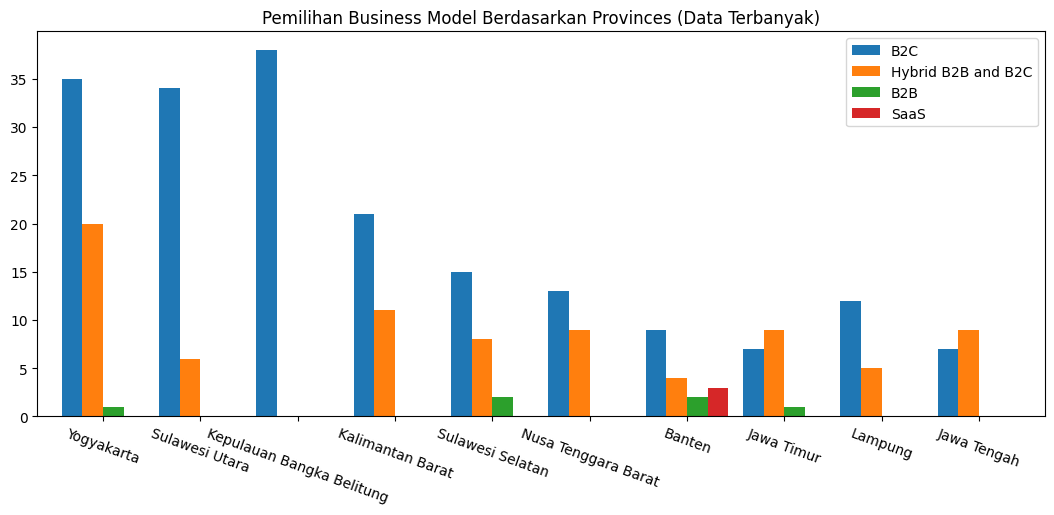

In [21]:
b2c = [35, 34, 38, 21, 15, 13, 9, 7, 12, 7]
hybrid = [20, 6, 0, 11, 8, 9, 4, 9, 5, 9]
b2b = [1, 0, 0, 0, 2, 0, 2, 1, 0, 0]
saas = [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
index = ['Yogyakarta', 'Sulawesi Utara', 'Kepulauan Bangka Belitung', 'Kalimantan Barat', 'Sulawesi Selatan', 'Nusa Tenggara Barat', 'Banten', 'Jawa Timur', 'Lampung', 'Jawa Tengah']
industry_sector = pd.DataFrame({'B2C': b2c,
                                'Hybrid B2B and B2C': hybrid,
                                'B2B': b2b,
                                'SaaS': saas}, index=index)
fig, ax = plt.subplots(figsize=(13, 5))
industry_sector.plot.bar(title='Pemilihan Business Model Berdasarkan Provinces (Data Terbanyak)', width=0.85, ax=ax)
plt.xticks(rotation=340)
plt.show()

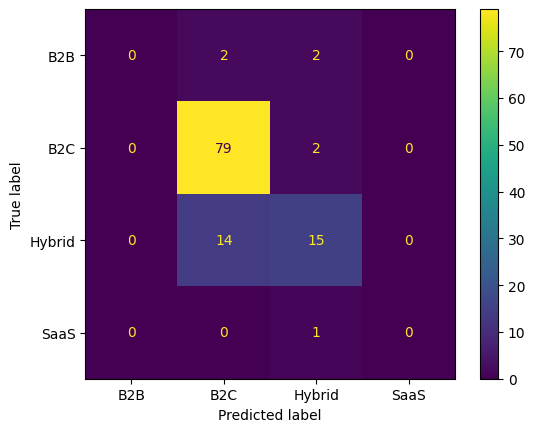

'\nB2B Benar = 0, salah 4\nB2C Benar = 79, salah 2\nHybrid benar = 16, salah 13\nSaaS benar = 0, salah 1\n\nDilihat dari confusion matrix diatas berarti bahwa data yang dipakai masih perlu tambahan\n'

In [22]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B2B', 'B2C', 'Hybrid', 'SaaS']).plot();
plt.savefig('confussion.jpg')
plt.show()

'''
B2B Benar = 0, salah 4
B2C Benar = 79, salah 2
Hybrid benar = 16, salah 13
SaaS benar = 0, salah 1

Dilihat dari confusion matrix diatas berarti bahwa data yang dipakai masih perlu tambahan
'''

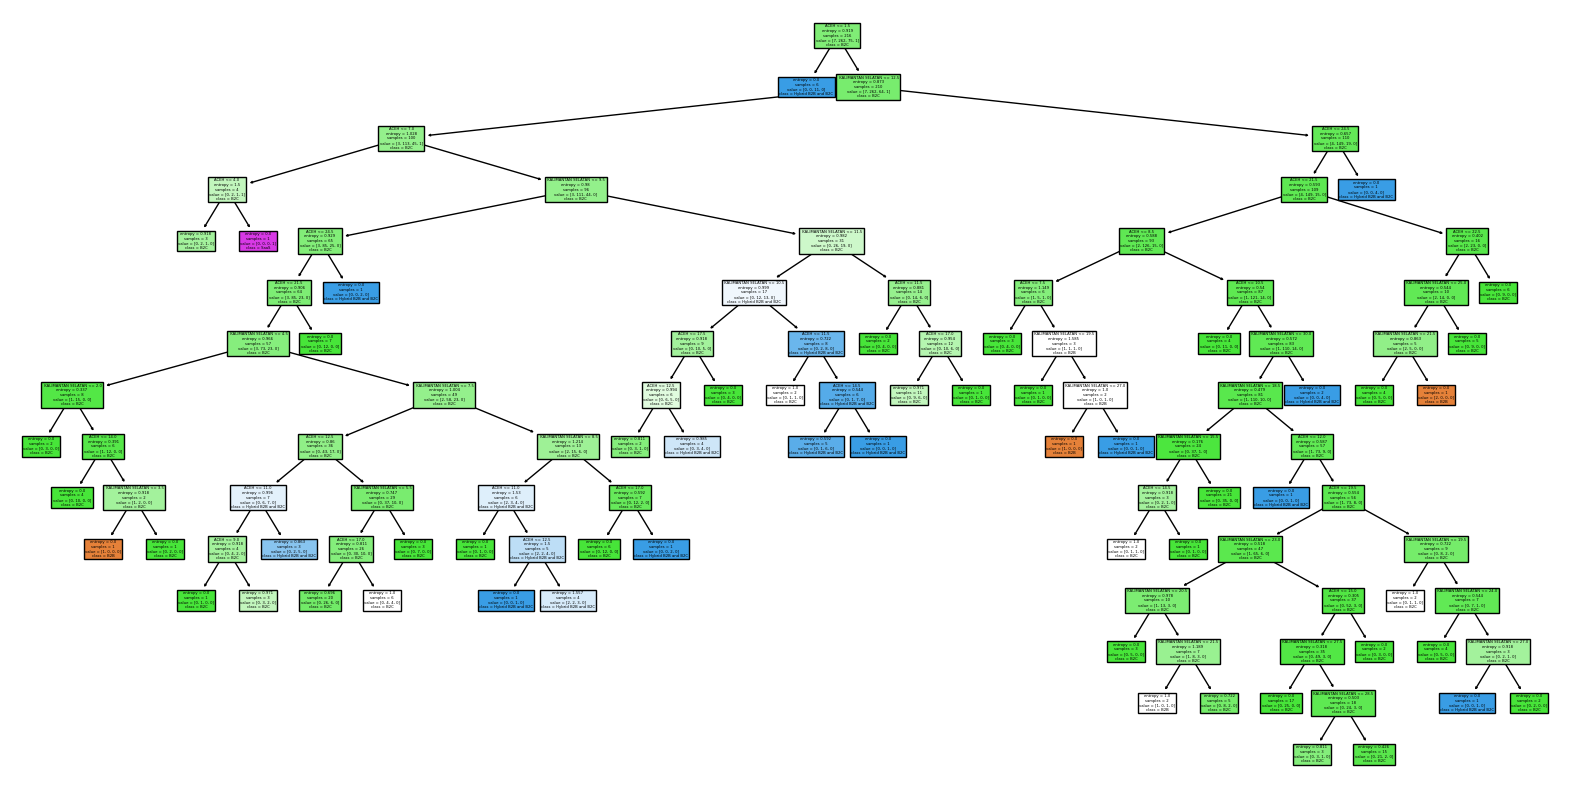

In [23]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = classifier.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=le1.classes_, class_names=le3.classes_, filled=True)
plt.savefig('provinsi.pdf')
plt.show()

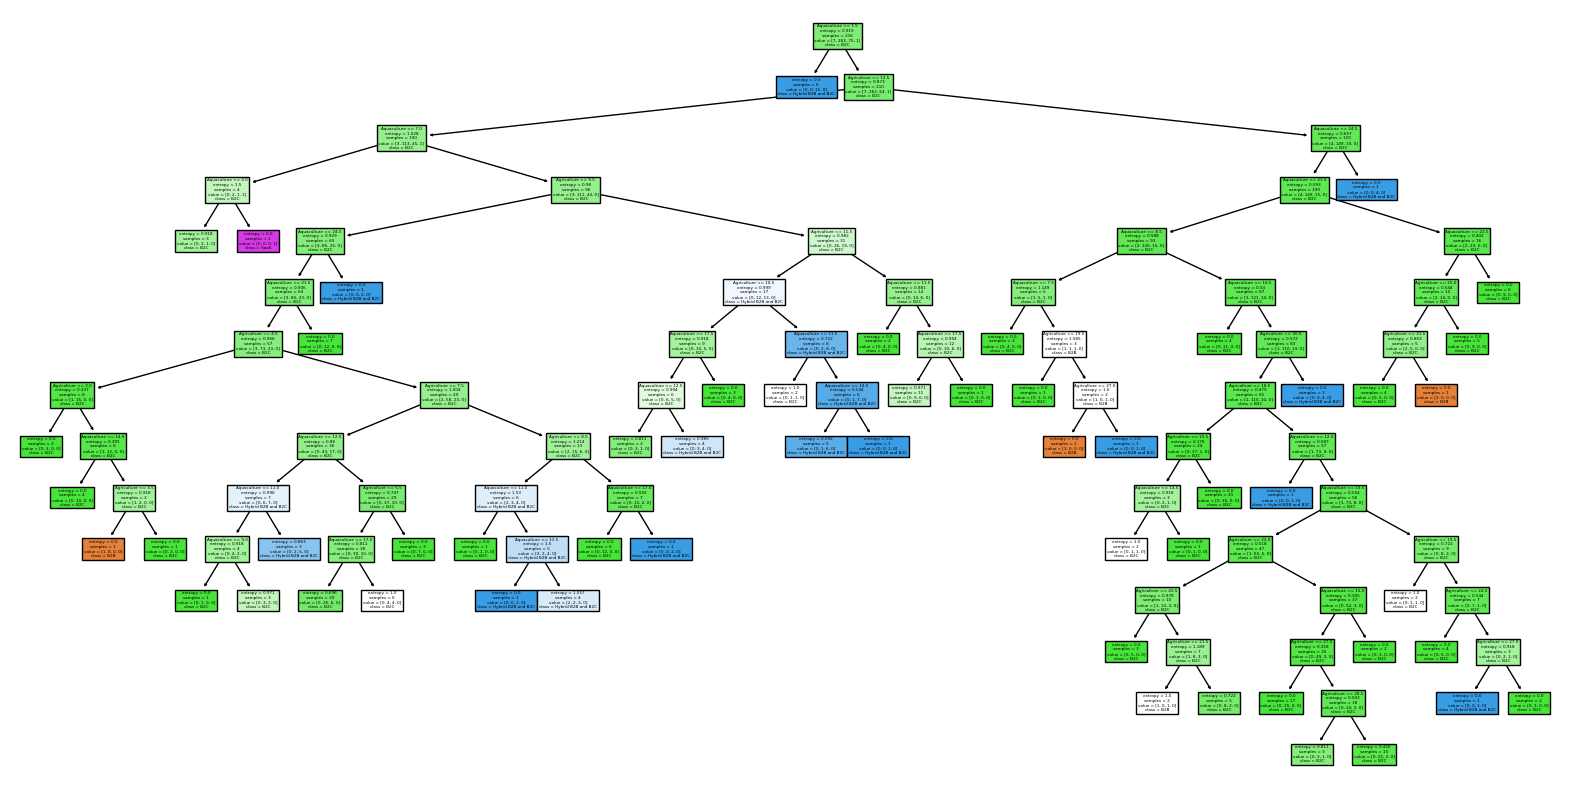

In [24]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=le2.classes_, class_names=le3.classes_, filled=True)
plt.savefig('sektor_industri.pdf')
plt.show()

In [45]:
X

,Entrepreneur,Provinces,Industry Sector,Main Products,Jumlah Tenaga Kerja,Business Model,Pendanaan
0,229,27,4,110,13,1,0
1,83,17,13,8,1,2,53
2,429,14,0,109,1,2,8
3,365,28,0,57,3,2,19
4,346,11,22,335,2,1,54
...,...,...,...,...,...,...,...
455,20,4,12,60,5,1,51
456,20,4,15,326,5,0,22
457,20,4,12,327,3,1,51
458,20,4,21,225,5,1,9
